### Half of Part 1 is done on paper

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special

In [31]:
def plot_func(func, domain, n_values, ylabel="yaxis", title="Function"):
    plt.figure(figsize=(8, 6))
    
    for n in n_values:
        y_values = [func(val, n) for val in domain]
        label = f'n = {n}'
        if n == 1000:
            label = "Exact"
        plt.plot(domain, y_values, label=label)
    plt.plot(x_exact, y_exact, 'k--', label='$e^x$ (Exact)')
    
    plt.xlabel('x')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

In [32]:
def power_series(x, n):
    return np.sum([x**val / scipy.special.factorial(val) for val in range(n)])

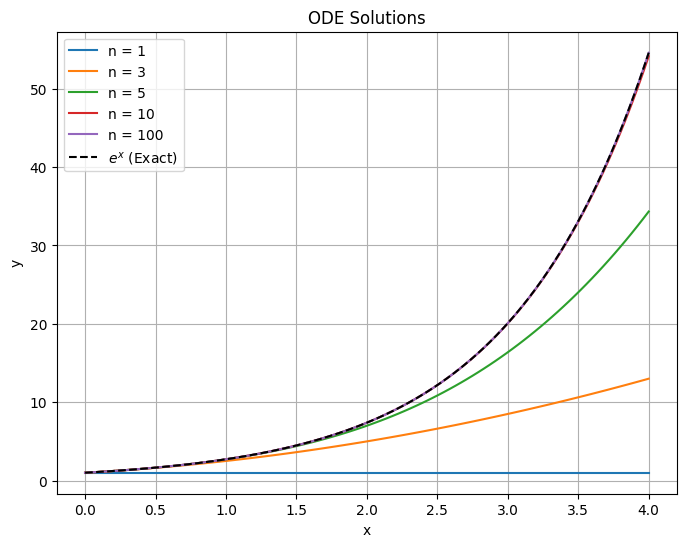

In [33]:
domain = np.linspace(0, 4, 100)  # Use a smooth range instead of [x for x in range(5)]
n_values = [1, 3, 5, 10, 100]

plot_func(power_series, domain, n_values, ylabel="y", title="ODE Solutions")

C:\Users\mckal\AppData\Local\Temp\ipykernel_13144\1820631762.py:2: RuntimeWarning: overflow encountered in scalar power
  return np.sum([x**val / scipy.special.factorial(val) for val in range(n)])
C:\Users\mckal\AppData\Local\Temp\ipykernel_13144\1820631762.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum([x**val / scipy.special.factorial(val) for val in range(n)])


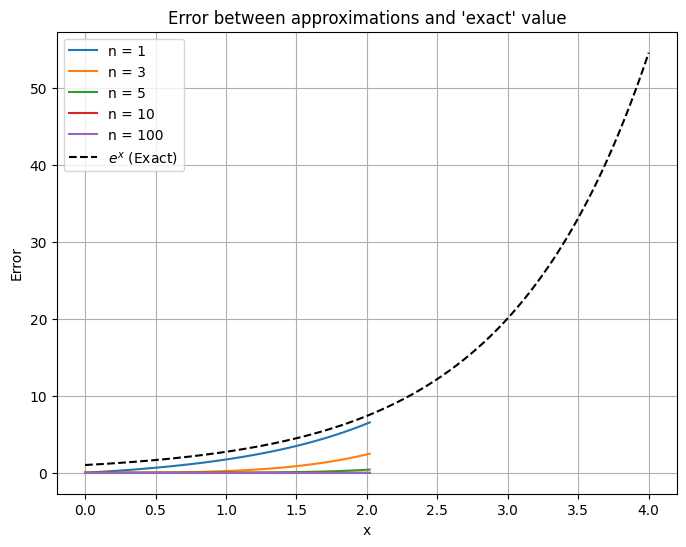

In [34]:
def error(x, n):
    return power_series(x, 1000) - power_series(x,n)

domain = np.linspace(0, 4, 100)  # Use a smooth range instead of [x for x in range(5)]
n_values = [1, 3, 5, 10, 100]

plot_func(error, domain, n_values, title="Error between approximations and 'exact' value", ylabel="Error")

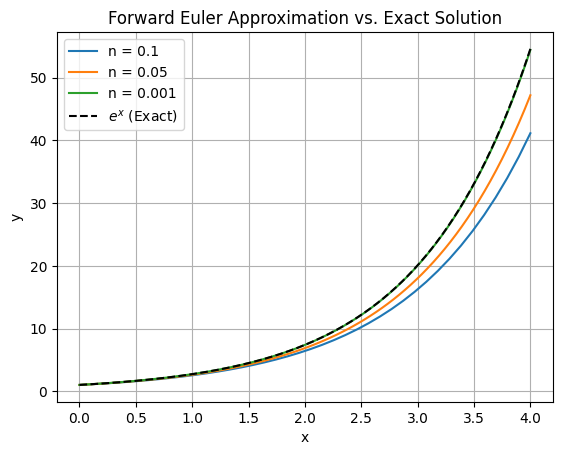

In [44]:
# Forward Euler's Method
def forward_euler_iterator(y_prev, delta_x, y_prime):
    return y_prev + delta_x * y_prime

def forward_euler_method(y0, max_iter, delta_x):
    y_val = []
    y_val.append(y0)
    for i in range(1, max_iter):
        y_val.append(forward_euler_iterator(y_val[-1], delta_x, y_val[-1]))

    return y_val


y0 = 1
grid_spacing = [0.1, 0.05, 0.001]

for gs in grid_spacing:
    num_steps = int(4 / gs)
    x_values = np.linspace(0, 4, num_steps)
    y_values = forward_euler_method(y0, num_steps, gs)
    label = f'n = {gs}'
    plt.plot(x_values, y_values, label=label)

x_exact = np.linspace(0, 4, 1000)
y_exact = np.exp(x_exact)
plt.plot(x_exact, y_exact, 'k--', label='$e^x$ (Exact)')

# Formatting the plot
plt.xlabel('x')
plt.ylabel('y')
plt.title('Forward Euler Approximation vs. Exact Solution')
plt.legend()
plt.grid(True)
plt.show()